# Update

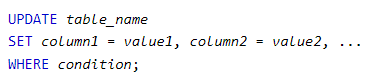

In [ ]:
-- Vorbereitung
USE AdventureWorks2017
GO
Drop Table if exists [Person].[Address_BAK]
GO
Select * 
into [Person].[Address_BAK]
From [Person].[Address]

## Standard-Schreibweise

In [ ]:
Select * from [Person].[Address_BAK] Where [AddressID] = 62 
/* Update eines bestimmten DS */
Update [Person].[Address_BAK]
Set [AddressLine1] = 'TEST'
Where [AddressID] = 62


Select * from [Person].[Address_BAK] Where [AddressID] = 62 

## Alternative Schreibweise (mit Alias)

In [ ]:
Select * from [Person].[Address_BAK] Where [AddressID] = 62 
GO
-- andere unübliche Schreibweise
Update T
Set [AddressLine1] = '3841 Silver Oaks Place'
From [Person].[Address_BAK] as T
Where [AddressID] = 62
GO
Select * from [Person].[Address_BAK] Where [AddressID] = 62 
GO

## Update mehrere Spalten

In [4]:
Select * from [Person].[Address_BAK] Where [AddressID] = 62 
GO
Update [Person].[Address_BAK]
Set [AddressLine1] = 'TEST',
ModifiedDate = getdate()
Where [AddressID] = 62
Select * from [Person].[Address_BAK] Where [AddressID] = 62 
GO

(1 row affected)

(1 row affected)

(1 row affected)

Total execution time: 00:00:00.042

AddressID,AddressLine1,AddressLine2,City,StateProvinceID,PostalCode,SpatialLocation,rowguid,ModifiedDate
62,3841 Silver Oaks Place,NULL,Monroe,79,98272,0xE6100000010CC56E23CC68EF4740949BC704EA835EC0,851aa003-2d0f-4165-a54b-a13d9b86924a,2008-11-27 00:00:00.000


AddressID,AddressLine1,AddressLine2,City,StateProvinceID,PostalCode,SpatialLocation,rowguid,ModifiedDate
62,TEST,NULL,Monroe,79,98272,0xE6100000010CC56E23CC68EF4740949BC704EA835EC0,851aa003-2d0f-4165-a54b-a13d9b86924a,2021-12-10 17:06:42.110


## Update mit INNER JOIN

In [ ]:
-- Vorbereitung
USE AdventureWorks2017
GO
Drop Table IF EXISTS [Person].[Address_BAK2]
Select * 
into [Person].[Address_BAK2]
From [Person].[Address]


In [8]:
-- Die Spalte StateProvinze von [Address_BAK2] an [Address_BAK] vergleichen
Select [s].AddressID,  [s].Addressline1, [t].[AddressID] ,[t].Addressline1
FROM [Person].[Address_BAK] as [s]
INNER JOIN [Person].[Address_BAK2] as [t] 
ON [s].[AddressID] = [t].[AddressID]
Where [s].Addressline1 <> [t].Addressline1

(0 rows affected)

Total execution time: 00:00:00.041

AddressID,Addressline1,AddressID,Addressline1


In [ ]:
UPDATE [t] 
SET [t].[Addressline1] = [s].[Addressline1] ,
[t].[ModifiedDate] = getdate()
FROM [Person].[Address_BAK] as [s]
INNER JOIN [Person].[Address_BAK2] as [t] 
ON [s].[AddressID] = [t].[AddressID]
Where [t].[Addressline1] <> [s].[Addressline1] 
GO
Select * from [Person].[Address_BAK2] Where [AddressID] = 62 
GO

In [ ]:
-- alternative Schreibweise analog zu ORACLE
Update [t]
Set [t].[StateProvinceID] = [s].[StateProvinceID]
From [Person].[Address_BAK] as [s]
, [Person].[Address_BAK2] as [t] 
WHERE [s].[AddressID] = [t].[AddressID]
and [t].[Addressline1] <> [s].[Addressline1] 